In [ ]:
# hide
%load_ext autoreload
%autoreload 2

# Evaluation Buchwald Hartwig

> Predicting the yield of Buchwald Hartwig HTE reactions 

In [ ]:
# data
import logging
import sklearn
import torch
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
from rxnfp.models import SmilesClassificationModel
from rxn_yields.data import generate_buchwald_hartwig_rxns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import os
from IPython.display import display
%matplotlib inline
torch.cuda.is_available()

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
This extension has only been tested with simpletransformers==0.34.4


True

In [ ]:
# data
NAME_SPLIT = [
    ('FullCV_01', 2768),
    ('FullCV_02', 2768),
    ('FullCV_03', 2768),
    ('FullCV_04', 2768),
    ('FullCV_05', 2768),
    ('FullCV_06', 2768),
    ('FullCV_07', 2768),
    ('FullCV_08', 2768),
    ('FullCV_09', 2768),
    ('FullCV_10', 2768),
    ('Test1', 3058),
    ('Test2', 3056),
    ('Test3', 3059),
    ('Test4', 3056),
]

In [ ]:
# data
def load_model_from_results_folder(name, split, epoch=10, results_folder='../trained_models/buchwald_hartwig', model_type='bert'):
    import os
    
    models_folder = os.path.join(results_folder, f"{name}_split_{str(split).replace('-','_')}")
    model_path = [os.path.join(models_folder, o) for o in os.listdir(models_folder) 
                        if os.path.isdir(os.path.join(models_folder,o)) and o.endswith(f'epoch-{epoch}')][0]
    
    
    model = SmilesClassificationModel(model_type, model_path,
                                  num_labels=1, args={
                                      "regression": True
                                  }, use_cuda=torch.cuda.is_available())
    return model

def make_plot(y_test, y_pred, rsme, r2_score, mae, name):
    fontsize = 16
    fig, ax = plt.subplots(figsize=(8,8))
    r2_patch = mpatches.Patch(label="R2 = {:.3f}".format(r2_score), color="#5402A3")
    rmse_patch = mpatches.Patch(label="RMSE = {:.1f}".format(rmse), color="#5402A3")
    mae_patch = mpatches.Patch(label="MAE = {:.1f}".format(mae), color="#5402A3")
    plt.xlim(-5,105)
    plt.ylim(-5,105)
    plt.scatter(y_pred, y_test, alpha=0.2, color="#5402A3")
    plt.plot(np.arange(100), np.arange(100), ls="--", c=".3")
    plt.legend(handles=[r2_patch, rmse_patch, mae_patch], fontsize=fontsize)
    ax.set_ylabel('Measured', fontsize=fontsize)
    ax.set_xlabel('Predicted', fontsize=fontsize)
    ax.set_title(name, fontsize=fontsize)
    return fig

Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.



FullCV_01 | R2 0.95 | RMSE 6.2 | MAE 4.2


Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.



FullCV_02 | R2 0.94 | RMSE 6.5 | MAE 4.2


Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.



FullCV_03 | R2 0.94 | RMSE 6.5 | MAE 4.2


Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.



FullCV_04 | R2 0.96 | RMSE 5.8 | MAE 3.7


Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.



FullCV_05 | R2 0.95 | RMSE 6.0 | MAE 4.0


Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.



FullCV_06 | R2 0.96 | RMSE 5.7 | MAE 3.8


Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.



FullCV_07 | R2 0.96 | RMSE 5.8 | MAE 4.0


Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.



FullCV_08 | R2 0.95 | RMSE 6.1 | MAE 4.0


Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.



FullCV_09 | R2 0.96 | RMSE 5.8 | MAE 4.0


Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.



FullCV_10 | R2 0.95 | RMSE 5.9 | MAE 3.9


Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.



Test1 | R2 0.84 | RMSE 11.0 | MAE 7.0


Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.



Test2 | R2 0.84 | RMSE 11.0 | MAE 7.1


Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.



Test3 | R2 0.74 | RMSE 14.4 | MAE 9.2


Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.



Test4 | R2 0.54 | RMSE 18.0 | MAE 12.7


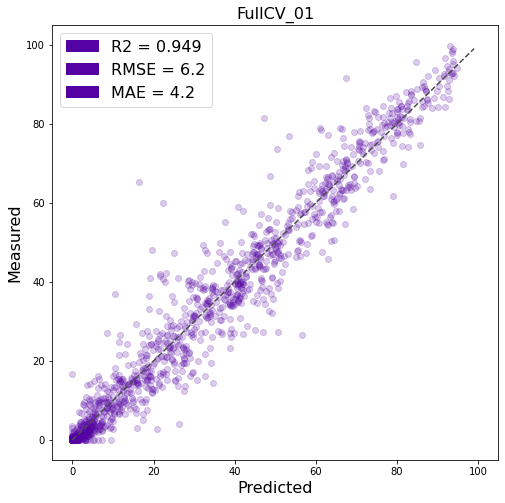

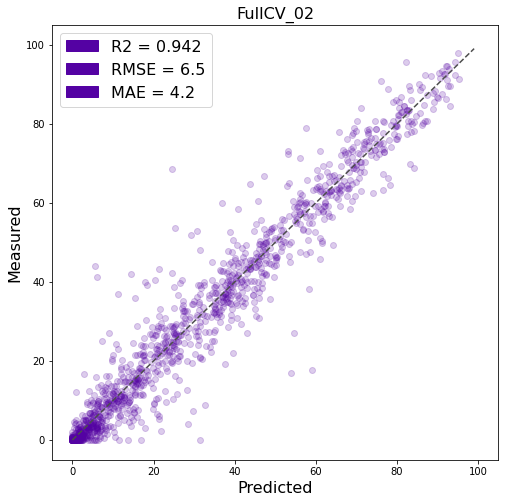

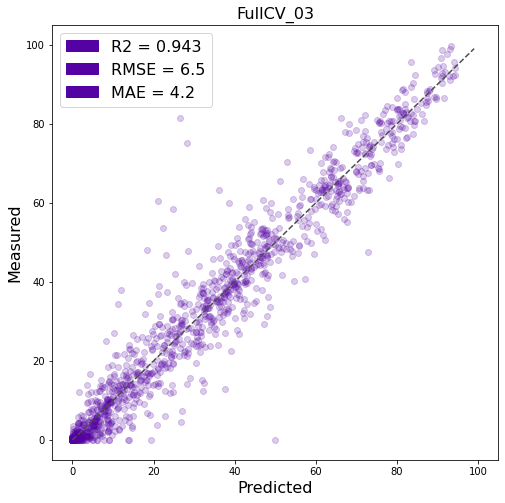

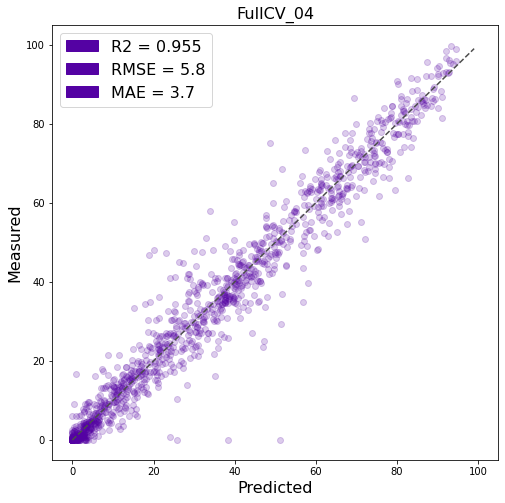

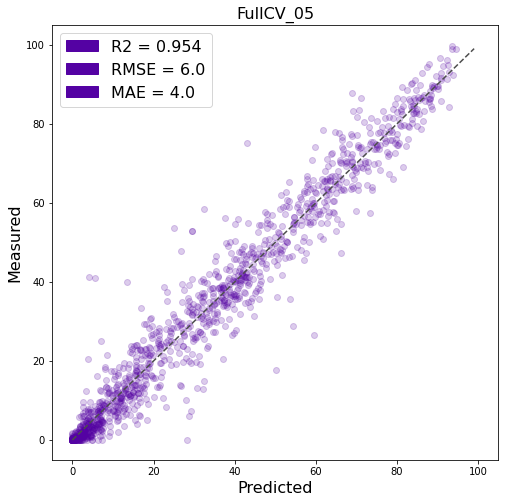

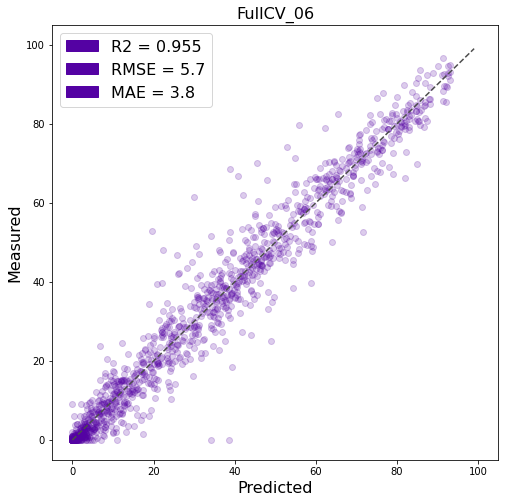

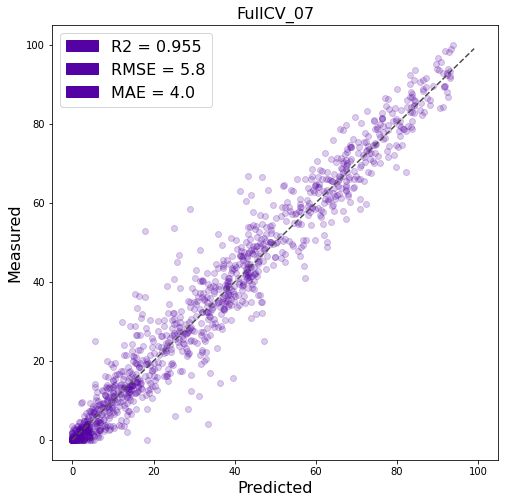

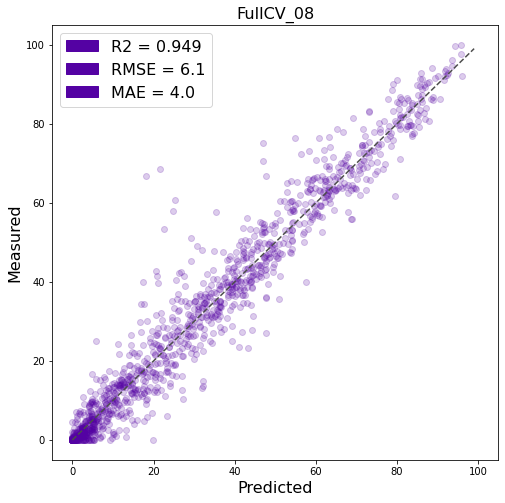

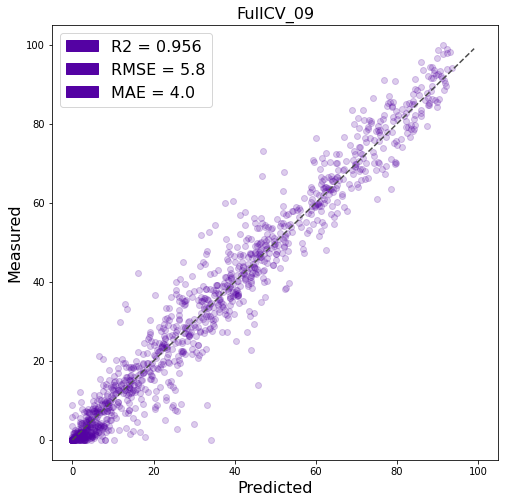

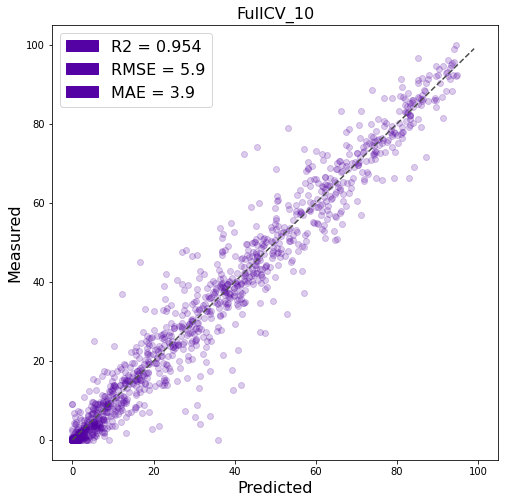

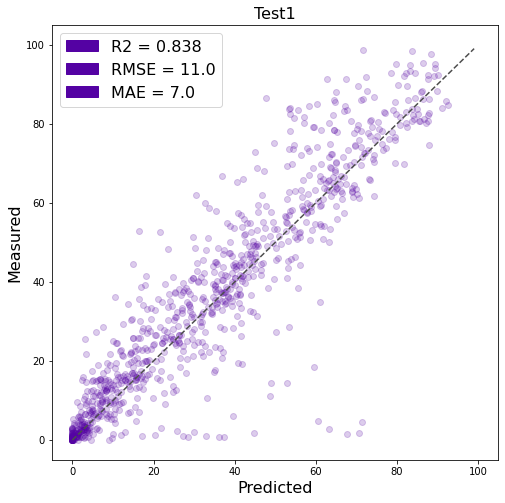

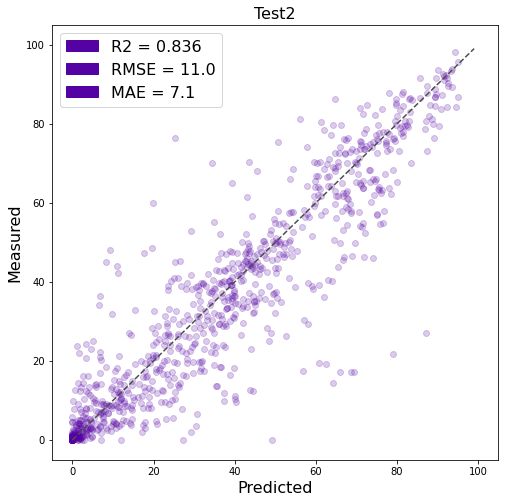

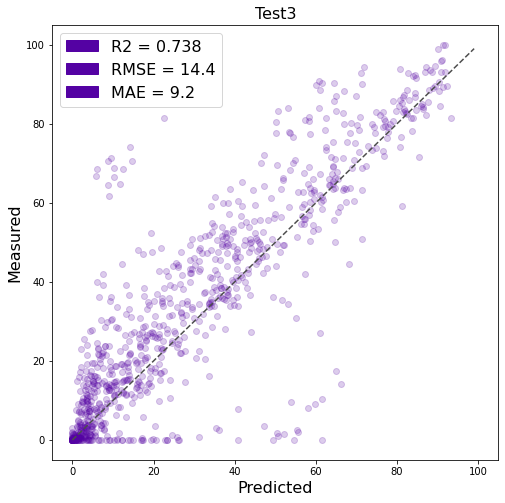

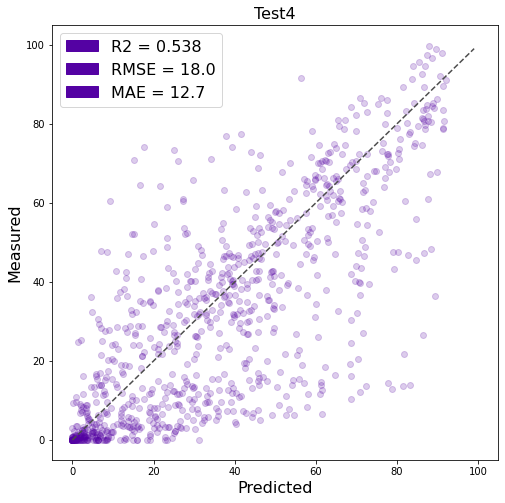

In [ ]:
# data
y_predictions = []
y_tests = []
r2_scores = []
rmse_scores = []

for (name, split) in NAME_SPLIT:

    df_doyle = pd.read_excel('../data/Buchwald-Hartwig/Dreher_and_Doyle_input_data.xlsx', sheet_name=name)

    df_doyle['rxn'] = generate_buchwald_hartwig_rxns(df_doyle)

    train_df = df_doyle.iloc[:split-1][['rxn', 'Output']] # paper has starting index 1 not 0
    test_df = df_doyle.iloc[split-1:][['rxn', 'Output']] # paper has starting index 1 not 0

    train_df.columns = ['text', 'labels']
    test_df.columns = ['text', 'labels']
    
    y_test = test_df.labels.values

    mean = train_df.labels.mean()
    std = train_df.labels.std()


    model = load_model_from_results_folder(name, split)
    
    y_preds = model.predict(test_df.text.values)[0]
    
    y_preds = y_preds * std + mean
    
    y_preds = np.clip(y_preds, 0, 100)
    
    r_squared = r2_score(y_test, y_preds)
    rmse = mean_squared_error(y_test, y_preds) ** 0.5
    mae = mean_absolute_error(y_test, y_preds)
    
    r2_scores.append(r_squared)
    
    print(f"{name} | R2 {r_squared:.2f} | RMSE {rmse:.1f} | MAE {mae:.1f}")
    fig = make_plot(y_test, y_preds, rmse, r_squared, mae, name)
        
    # fig.savefig(f'images/mlst_doyle_results/{name}_{split}.pdf')
    